<div style="display: flex; justify-content: center; align-items: center;">
  <img src="https://boldoutline.in/wp-content/uploads/2018/06/sunglasses-cover.jpg" 
       alt="My Image" 
       style="border-radius:15px; box-shadow:0 4px 10px rgba(0,0,0,0.3);">
</div>


# 🕶️ Glasses or No Glasses Classification  

This project is a task that focuses on classifying whether a person in an image is **wearing glasses** or **not**.  
The model is built using **Convolutional Neural Networks (CNNs)**, a deep learning technique commonly used for image recognition problems.  

---

## 🔑 Key Points:
- **Dataset**: Images of people with and without glasses.  
- **Goal**: Automatically detect the presence of glasses.  
- **Approach**:  
  - Data preprocessing (resizing, normalization, augmentation).  
  - CNN model design and training.  
  - Evaluation using accuracy and confusion matrix.  
- **Applications**:  
  - Face recognition systems.  
  - Smart attendance and security systems.  
  - Personalized recommendations (e.g., virtual try-on for glasses).  


## Importing Libraries

In [1]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import glob as gb
import tensorflow as tf
from tensorflow import keras
import pickle
import tensorflow as tf



import warnings 
warnings.filterwarnings('ignore')

2025-09-21 02:03:55.686637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758420235.874754      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758420235.929530      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 📂 Data Loading

In [2]:
IMG_SIZE = 224

class_map = {}
def load_images (base_path , sample_name ):
    X , y = [] ,[]
    classes = os.listdir(base_path)
    
    
    i = 0
    for cls in classes :
        class_map[cls] = i
        i+= 1
    
    # if sample_name in ['train' , 'validate']:
    for cls in classes :
        files = gb.glob(os.path.join(base_path ,cls,"*.jpg"))
        
        print(f"Class '{cls}' has {len(files)} images.")
        for file in tqdm(files , desc =f"reading {cls}"):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(class_map[cls])
    return np.array(X, dtype="float32"), np.array(y)



In [3]:
# Get The bath of Each folder
base_dir = "/kaggle/input/glasses"
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "validate")
test_dir  = os.path.join(base_dir, "test")


In [4]:
X_train, y_train = load_images(train_dir ,'train')
X_val, y_val     = load_images(val_dir , 'validate')
X_test , y_test= load_images(test_dir , 'test')


Class 'glasses' has 52 images.


reading glasses: 100%|██████████| 52/52 [00:00<00:00, 162.75it/s]


Class 'noglasses' has 52 images.


reading noglasses: 100%|██████████| 52/52 [00:00<00:00, 176.77it/s]


Class 'glasses' has 20 images.


reading glasses: 100%|██████████| 20/20 [00:00<00:00, 226.49it/s]


Class 'noglasses' has 20 images.


reading noglasses: 100%|██████████| 20/20 [00:00<00:00, 211.43it/s]


Class 'glasses' has 10 images.


reading glasses: 100%|██████████| 10/10 [00:00<00:00, 242.94it/s]


Class 'noglasses' has 10 images.


reading noglasses: 100%|██████████| 10/10 [00:00<00:00, 248.11it/s]


In [5]:
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_val:", X_val.shape, " y_val:", y_val.shape)
print("X_test:", X_test.shape ,"y_test:", y_test.shape ,)

X_train: (104, 224, 224, 3)  y_train: (104,)
X_val: (40, 224, 224, 3)  y_val: (40,)
X_test: (20, 224, 224, 3) y_test: (20,)


In [6]:
print(class_map)

{'glasses': 0, 'noglasses': 1}


In [7]:
# make Date mixing betweenClasses
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)

## Sample Representation


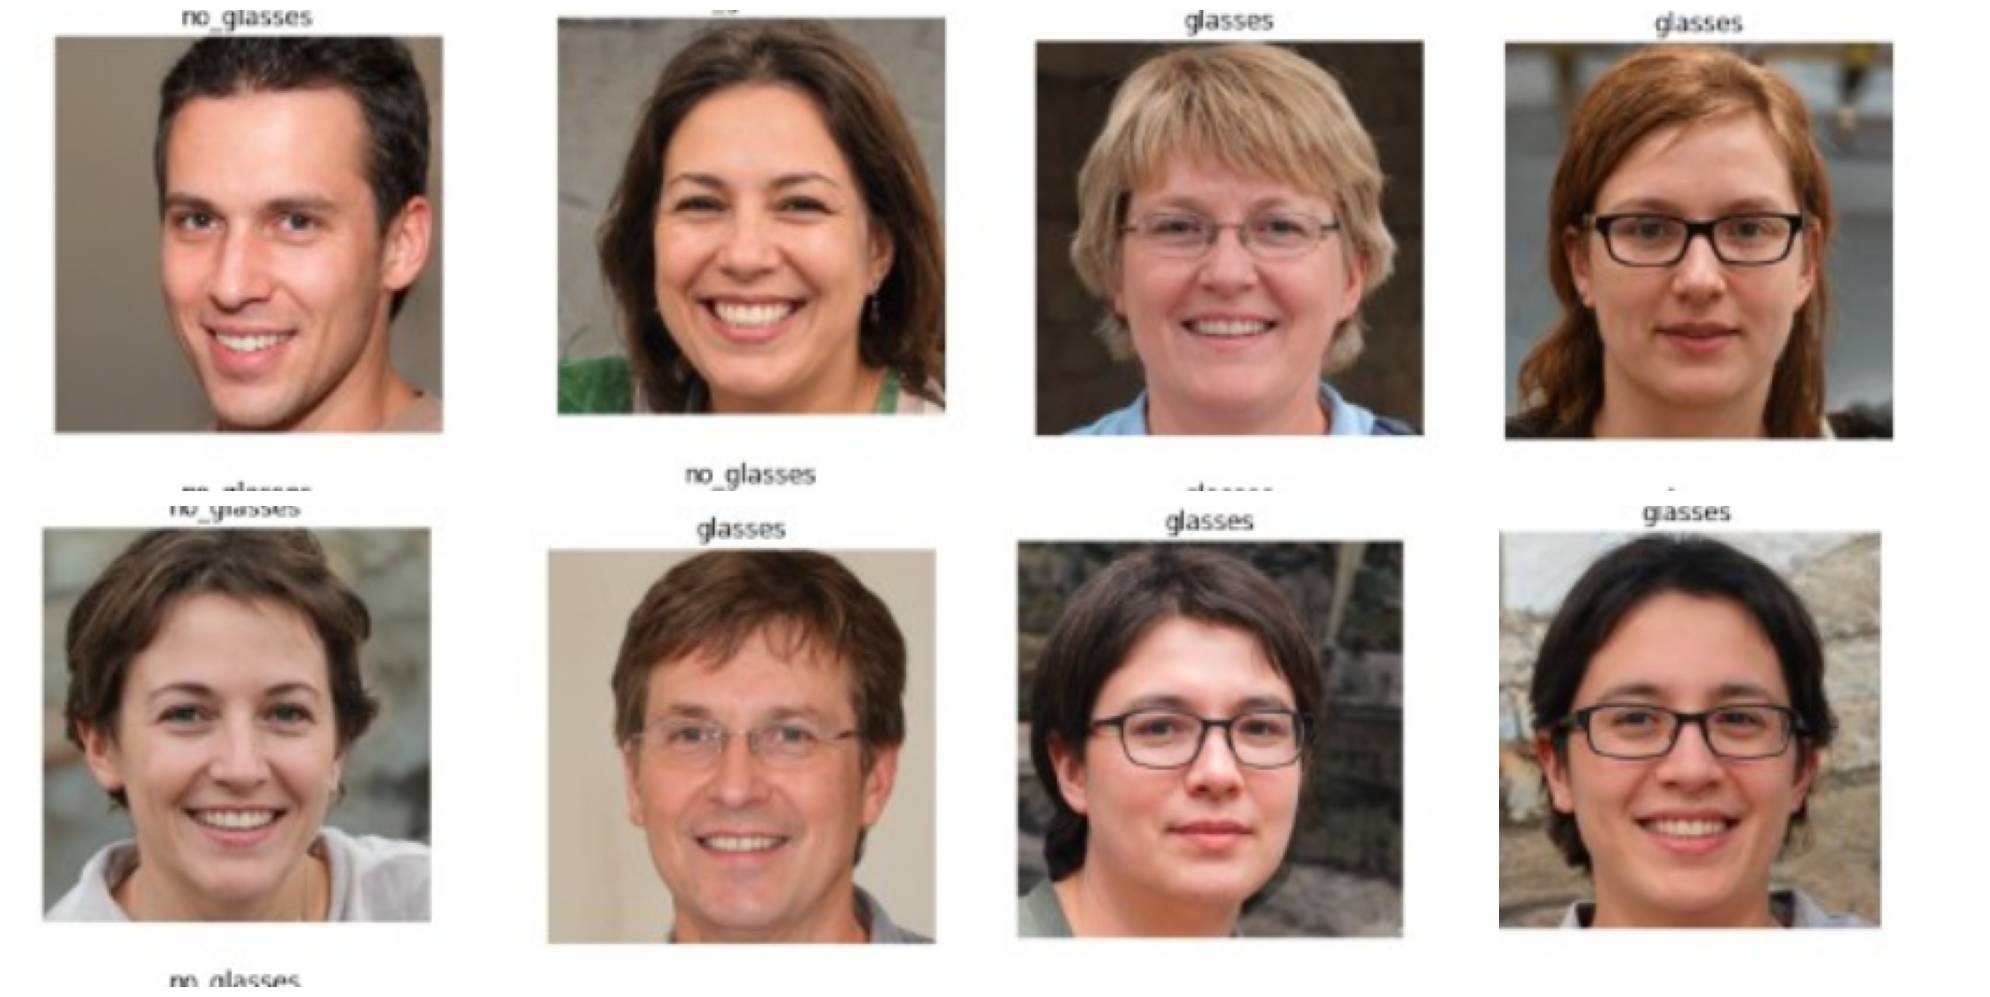

In [8]:
classes = {0: "glasses", 1: "noglasses"}

plt.figure(figsize=(20,20))

# random_idx = np.random.randint(0, len(X_train), 8)
for i in range (1,9):
    plt.subplot(4, 4, i)
    plt.imshow(X_train[i].astype("uint8"))
    plt.axis('off')
    # plt.title(classes[y_train[i]])

plt.tight_layout()
plt.show()

## Normalizing Data 


In [9]:
X_train=X_train/255.0
X_val=X_val/255.0
X_test = X_test / 255.0

## 🌀 Data Augmentation


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    
)

datagen.fit(X_train)


## 🧠 CNN Model

In [11]:
# Building the model
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile Model
model.compile(loss="binary_crossentropy", optimizer= 'Adam', metrics=["accuracy","precision","recall"])


# Fitting Model
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=16,
                    validation_data=(X_val, y_val),  
                    shuffle=True,
                   verbose = 2) 

I0000 00:00:1758420252.273151      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/100


I0000 00:00:1758420256.396154      63 service.cc:148] XLA service 0x7c7b7000bf80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758420256.396916      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758420256.699450      63 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1758420258.840492      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 - 8s - 1s/step - accuracy: 0.4808 - loss: 1.0242 - precision: 0.4815 - recall: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.8414 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/100
7/7 - 0s - 24ms/step - accuracy: 0.8173 - loss: 0.4118 - precision: 0.7895 - recall: 0.8654 - val_accuracy: 0.7000 - val_loss: 0.6078 - val_precision: 0.6538 - val_recall: 0.8500
Epoch 3/100
7/7 - 0s - 24ms/step - accuracy: 0.8942 - loss: 0.2882 - precision: 0.9362 - recall: 0.8462 - val_accuracy: 0.6500 - val_loss: 0.8331 - val_precision: 0.6000 - val_recall: 0.9000
Epoch 4/100
7/7 - 0s - 24ms/step - accuracy: 0.9231 - loss: 0.1986 - precision: 0.9231 - recall: 0.9231 - val_accuracy: 0.6250 - val_loss: 1.0648 - val_precision: 0.5806 - val_recall: 0.9000
Epoch 5/100
7/7 - 0s - 22ms/step - accuracy: 0.9327 - loss: 0.1787 - precision: 0.9412 - recall: 0.9231 - val_accuracy: 0.6750 - val_loss: 1.0893 - val_precision: 0.6207 - val_recall: 0.9000
Epoch 6/100
7/7 - 0s - 22ms/step - accuracy: 0.9519 - loss:

## 🧠 Transfer Learning Model

### Checkpoint to Save Best models and Weights

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_model.h5",            
    monitor="val_accuracy",       
    mode="max",                   
    save_best_only=True,        
    verbose=2
)


In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  

model2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


# Compile Model
model2.compile(loss="binary_crossentropy", optimizer= 'Adam', metrics=["accuracy","precision","recall"])



# Fitting Model
history2 = model2.fit(X_train, y_train, epochs=50,
                    batch_size=16,
                    validation_data=(X_val, y_val), 
                    callbacks=[checkpoint],
                    shuffle=True,
                    verbose=2) 


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to best_model.h5
7/7 - 13s - 2s/step - accuracy: 0.4904 - loss: 2.1935 - precision: 0.4878 - recall: 0.3846 - val_accuracy: 0.6000 - val_loss: 0.9288 - val_precision: 0.5556 - val_recall: 1.0000
Epoch 2/50

Epoch 2: val_accuracy improved from 0.60000 to 0.95000, saving model to best_model.h5
7/7 - 1s - 102ms/step - accuracy: 0.7885 - loss: 0.6659 - precision: 0.7679 - recall: 0.8269 - val_accuracy: 0.9500 - val_loss: 0.1907 - val_precision: 1.0000 - val_recall: 0.9000
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.95000
7/7 - 0s - 65ms/step - accuracy: 0.8462 - loss: 0.4000 - precision: 0.8600 - recall: 0.8269 - val_accuracy: 0.7000 - val_loss: 0.7660 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.95000
7/7 - 0s - 66ms/step - accuracy: 0.9038 - loss: 0.1779 - precision: 0.8750 - recall: 0.9423 -

## 📊 Model Evaluation
In this section, we evaluate the performance of the trained model using:  
- **Accuracy**
- **Percision**
- **Recall**
- **Loss Curves**  
- **Confusion Matrix**  
- **Classification Report (Precision, Recall, F1-score)**  


In [14]:
import seaborn as sns
sns.set()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

precision = history2.history['precision']
val_precision = history2.history['val_precision']

recall =history2.history['recall']
val_recall =history2.history['val_recall']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

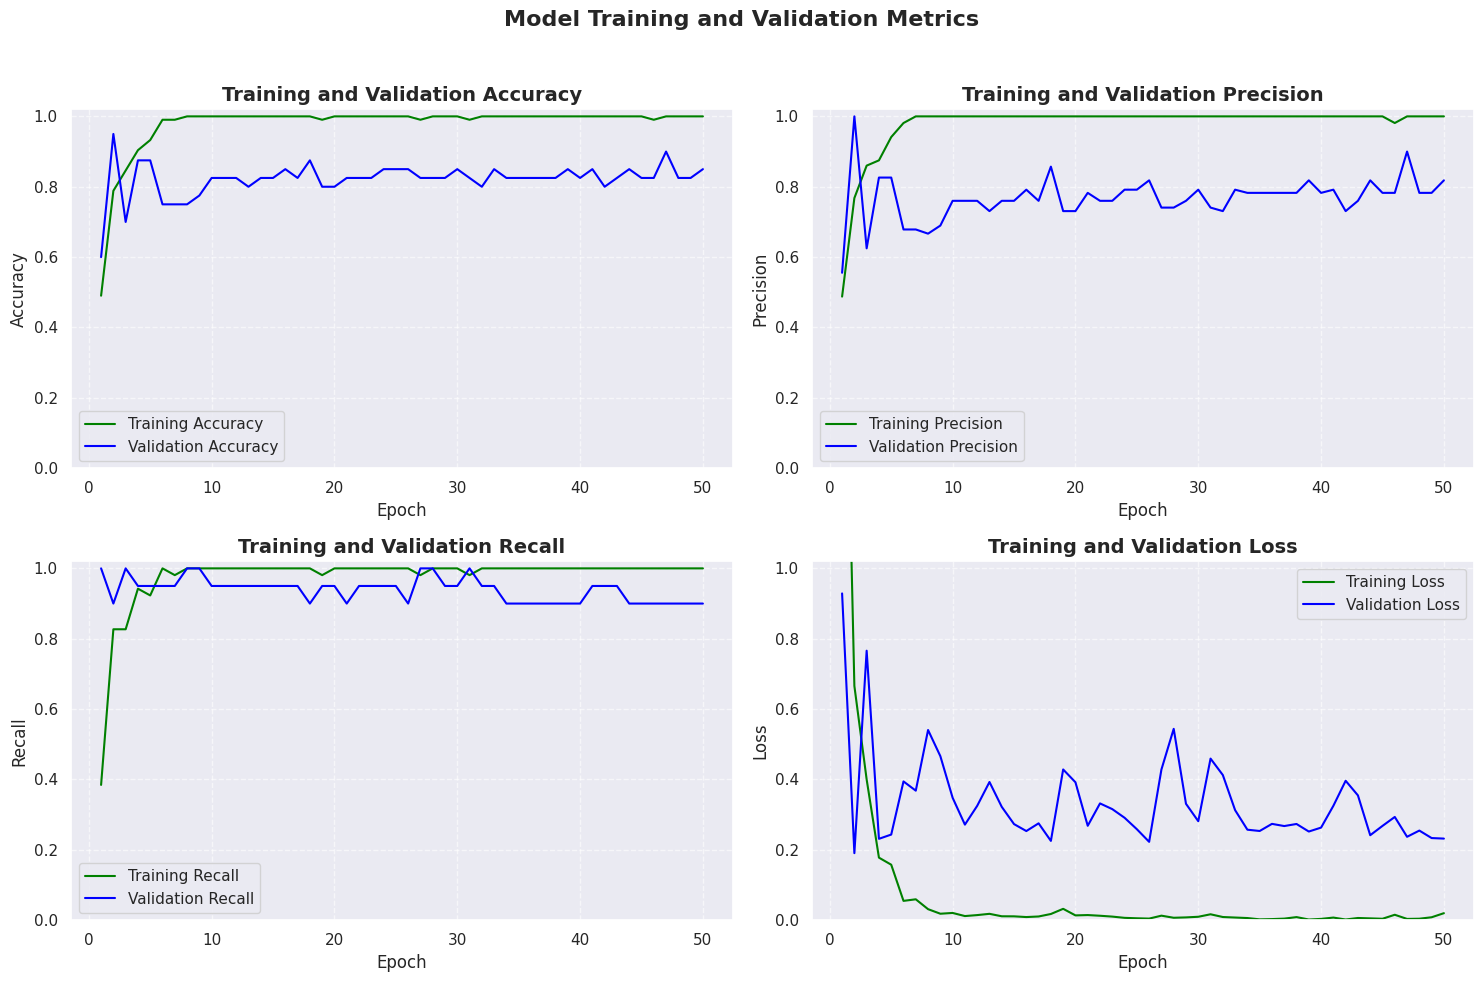

In [15]:
plt.figure(figsize=(15, 10))

# 1. Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Precision
plt.subplot(2, 2, 2)
plt.plot(epochs, precision, color='green', label='Training Precision')
plt.plot(epochs, val_precision, color='blue', label='Validation Precision')
plt.title('Training and Validation Precision', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Recall
plt.subplot(2, 2, 3)
plt.plot(epochs, recall, color='green', label='Training Recall')
plt.plot(epochs, val_recall, color='blue', label='Validation Recall')
plt.title('Training and Validation Recall', fontsize=14, fontweight='bold')
plt.ylabel('Recall', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Loss
plt.subplot(2, 2, 4)
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Training and Validation Metrics', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
model_evaluate = model2.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
print("Precision  : ",model_evaluate[2])
print("Recall : ",model_evaluate[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 2.2586e-04 - precision: 1.0000 - recall: 1.0000
Loss     :  0.00022586004342883825
Accuracy :  1.0
Precision  :  1.0
Recall :  1.0


In [17]:
y_prob = model2.predict(X_test).reshape(-1)
y_pred = (y_prob >= 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


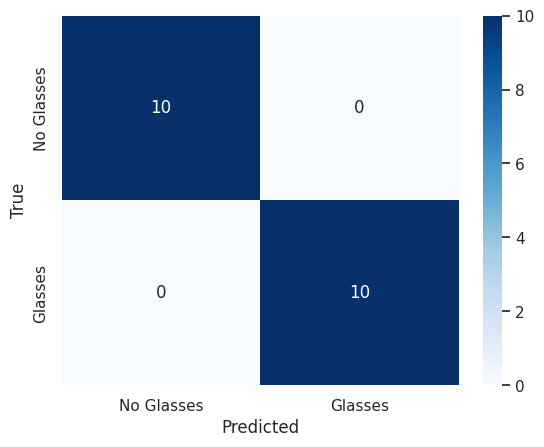

In [18]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Glasses','Glasses'],
            yticklabels=['No Glasses','Glasses'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred,
    target_names=['No Glasses', 'Glasses'],
    zero_division=0
))


              precision    recall  f1-score   support

  No Glasses       1.00      1.00      1.00        10
     Glasses       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# 🎯 Model Demo: Glasses or No Glasses  

In this section, we demonstrate how the trained CNN model can classify a new image directly from a URL.  

Steps:  
1. **Fetch Image**: Download image from the internet using its link.  
2. **Preprocess**: Resize and normalize the image to match the model’s input.  
3. **Prediction**: The model predicts whether the person is wearing **Glasses** or **No Glasses**.  
4. **Visualization**: Display the image alongside the prediction result.  

---


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


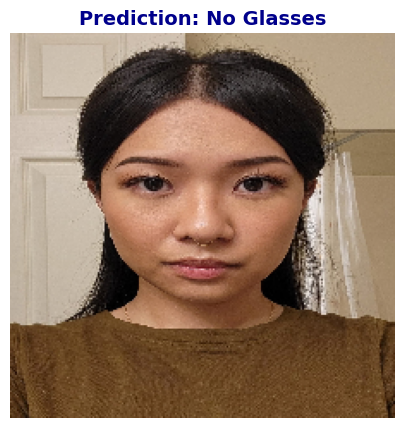

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

IMG_SIZE = 224
path = 'https://external-preview.redd.it/feeling-like-my-face-looks-weird-without-my-glasses-can-i-v0-31Su842KZjUAYtEE2tDS7XpbDPZScb1EgCIhYWuC7Pk.jpg?auto=webp&s=e7b2af1733517a6881033e2fdf12dad68194d04b'

# تحميل الصورة من URL
response = requests.get(path)
img = Image.open(BytesIO(response.content))
img = np.array(img)

# تحويل ل RGB
if img.ndim == 2:  # grayscale
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
elif img.shape[2] == 4:  # RGBA
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# Resize
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

# Normalization
img_norm = img_resized.astype("float32") / 255.0
img_norm = np.expand_dims(img_norm, axis=0)

# Prediction
pr = model2.predict(img_norm)
pr = (pr >= 0.5).astype(int)

label = "Glasses" if pr == 0 else "No Glasses"

# Visualization with result
plt.figure(figsize=(5,5))
plt.imshow(img_resized.astype("uint8"))
plt.title(f"Prediction: {label}", fontsize=14, fontweight='bold', color="darkblue")
plt.axis("off")
plt.show()
